<a href="https://colab.research.google.com/github/ram130849/annual_income_classification_using_Xg_boost_LightBGM/blob/main/Adult_Income_Classification_Using_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector as selector

In [2]:
!unzip adult.csv.zip -d "/content/"

Archive:  adult.csv.zip
  inflating: /content/adult.csv      


In [3]:
df = pd.read_csv('/content/adult.csv')
print(df.head(10))

   age    workclass  fnlwgt     education  education.num marital.status  \
0   90            ?   77053       HS-grad              9        Widowed   
1   82      Private  132870       HS-grad              9        Widowed   
2   66            ?  186061  Some-college             10        Widowed   
3   54      Private  140359       7th-8th              4       Divorced   
4   41      Private  264663  Some-college             10      Separated   
5   34      Private  216864       HS-grad              9       Divorced   
6   38      Private  150601          10th              6      Separated   
7   74    State-gov   88638     Doctorate             16  Never-married   
8   68  Federal-gov  422013       HS-grad              9       Divorced   
9   41      Private   70037  Some-college             10  Never-married   

          occupation    relationship   race     sex  capital.gain  \
0                  ?   Not-in-family  White  Female             0   
1    Exec-managerial   Not-in-family

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')


In [5]:
df.drop(['fnlwgt','capital.gain','capital.loss'],axis=1,inplace=True)

In [7]:
print(sorted(df['marital.status'].unique()))

['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed']


In [8]:
print(sorted(df['age'].unique()))

[17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90]


In [9]:
print(sorted(df['workclass'].unique()))

['?', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay']


In [10]:
print(sorted(df['education'].unique()))

['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad', 'Masters', 'Preschool', 'Prof-school', 'Some-college']


In [11]:
print(sorted(df['income'].unique()))

['<=50K', '>50K']


In [12]:
print(sorted(df['race'].unique()))

['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White']


In [13]:
print(sorted(df['native.country'].unique()))

['?', 'Cambodia', 'Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England', 'France', 'Germany', 'Greece', 'Guatemala', 'Haiti', 'Holand-Netherlands', 'Honduras', 'Hong', 'Hungary', 'India', 'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico', 'Nicaragua', 'Outlying-US(Guam-USVI-etc)', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto-Rico', 'Scotland', 'South', 'Taiwan', 'Thailand', 'Trinadad&Tobago', 'United-States', 'Vietnam', 'Yugoslavia']


In [14]:
df.describe(include='all')

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
count,32561.000000,32561,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561,32561
unique,NaN,9,16,NaN,7,15,6,5,2,NaN,42,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,United-States,<=50K
freq,NaN,22696,10501,NaN,14976,4140,13193,27816,21790,NaN,29170,24720
mean,38.581647,NaN,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,40.437456,NaN,NaN
std,13.640433,NaN,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,12.347429,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN
75%,48.000000,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,NaN


In [15]:
df.shape

(32561, 12)

In [6]:
#cleaning string in object columns
for i in df.columns:
    if(df[i].dtype=='object'):
        df[i] = df[i].str.strip()

In [7]:
df['income'] = df['income'].replace('>50K',1)
df['income'] = df['income'].replace('<=50K',0)
df.astype({'income': 'object'})

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
0,90,?,HS-grad,9,Widowed,?,Not-in-family,White,Female,40,United-States,0
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,0
2,66,?,Some-college,10,Widowed,?,Unmarried,Black,Female,40,United-States,0
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,0
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,40,United-States,0
32557,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,0
32558,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,1
32559,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,0


In [18]:
print(df['income'].unique())

[0 1]


In [19]:
print(df[df['income']==0].shape)
print(df[df['income']==1].shape)

(24720, 12)
(7841, 12)


In [8]:
df[df == '?'] = np.nan

In [9]:
for col in ['workclass', 'occupation', 'native.country','marital.status','education','education.num','age']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [10]:
# Getting the index of '?' in rows and remove those rows.
l=[]
for i in df.columns:
    for j in range(df.shape[0]):
        if df[i][j]==np.nan:
            l.append(j)
print('length of rows:',len(l))
df.drop(index=l,inplace=True)

length of rows: 0


In [11]:
#no null value in dataset
df.isnull().sum()

age               0
workclass         0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [24]:
#doing private job and salary more than 50K
new_df = df[df['workclass']=='Private']
print(len(new_df[new_df['income']==1]))
new_df[new_df['income']==1].head(2)

5154


,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
9,41,Private,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,60,United-States,1
10,45,Private,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,35,United-States,1


In [25]:
new_df[new_df['income']==0].head(2)

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
0,90,Private,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,40,United-States,0
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,0


sex     Female   Male
income               
0         9592  15128
1         1179   6662


<AxesSubplot:xlabel='income'>

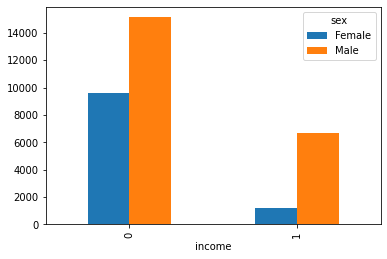

In [26]:
#cheacking male and female ratio according to their salary
class_sex = pd.crosstab(df['income'],df['sex'])
print(class_sex)
class_sex.plot(kind='bar')

income                  0     1
race                           
Amer-Indian-Eskimo    275    36
Asian-Pac-Islander    763   276
Black                2737   387
Other                 246    25
White               20699  7117


<AxesSubplot:xlabel='race'>

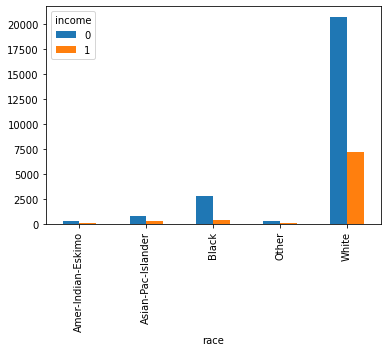

In [27]:
class_race = pd.crosstab(df['race'],df['income'])
print(class_race)
class_race.plot(kind='bar')

In [28]:
df['workclass'].value_counts()

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [12]:
#how many of people whose age above 40 earn more than 50K
avg_age = df[df['age']>40]
print(len(avg_age[avg_age['income']==1]))
avg_age[avg_age['income']==1].head(2)

4753


,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
7,74,State-gov,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,20,United-States,1
9,41,Private,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,60,United-States,1


In [30]:
#how many of people whose age above average earn less than 50K
print(len(avg_age[avg_age['income']==0]))
avg_age[avg_age['income']==0].head(2)

8690


,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
0,90,Private,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,40,United-States,0
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,0


<AxesSubplot:xlabel='income'>

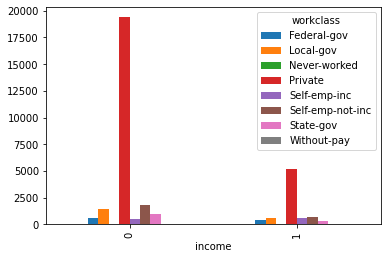

In [31]:
#cheacking distribution of people in working class according to salary
class_salary = pd.crosstab(df['income'],df['workclass'])
class_salary.plot(kind='bar')

<AxesSubplot:xlabel='education'>

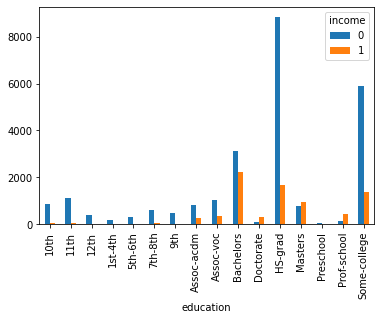

In [37]:
#checking distribution of people according to education
salary_education = pd.crosstab(df['education'],df['income'])
salary_education.plot(kind='bar')

In [14]:
# numerical columns
num_col=[]
for i in df.columns:
    if df[i].dtype=='int64':
        num_col.append(i)

num_col = num_col[:-1] 
num_col

['age', 'education.num', 'hours.per.week']

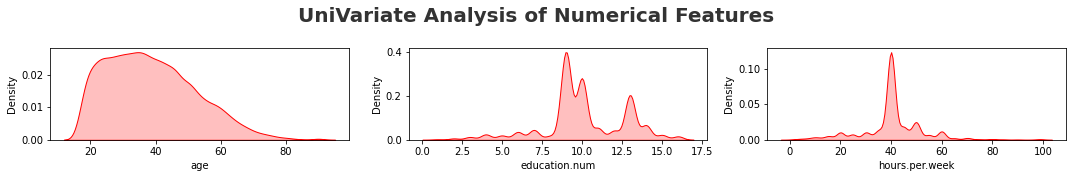

In [15]:
plt.figure(figsize=(15,15))
plt.suptitle('UniVariate Analysis of Numerical Features',fontsize=20,fontweight='bold',alpha=0.8,y=1)
for i in range(0, len(num_col)):
    plt.subplot(8, 3, i+1)
    sns.kdeplot(x=df[num_col[i]],shade=True, color='r')
    plt.xlabel(num_col[i])
    plt.tight_layout()
plt.show()

In [13]:
#categorical columns
cat_col=[]
for i in df.columns:
    if df[i].dtype=='object':
        cat_col.append(i)
cat_col 

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country']

<Figure size 432x288 with 0 Axes>

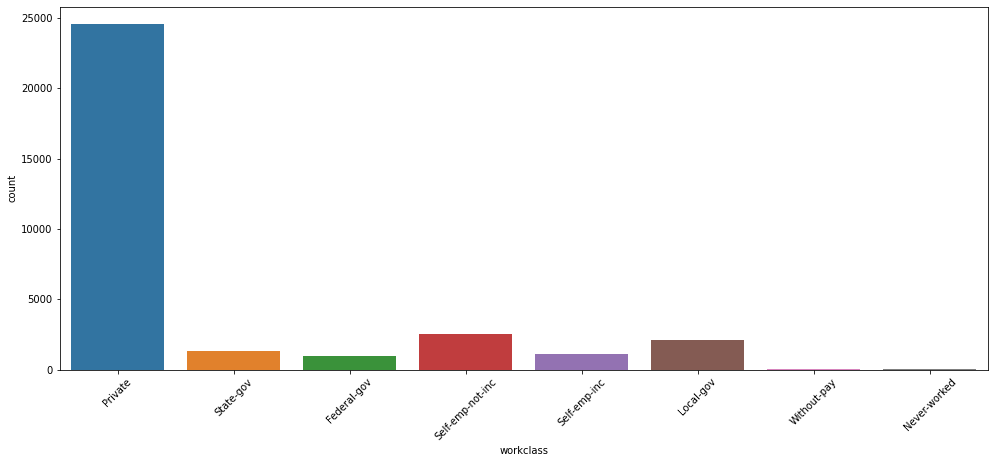

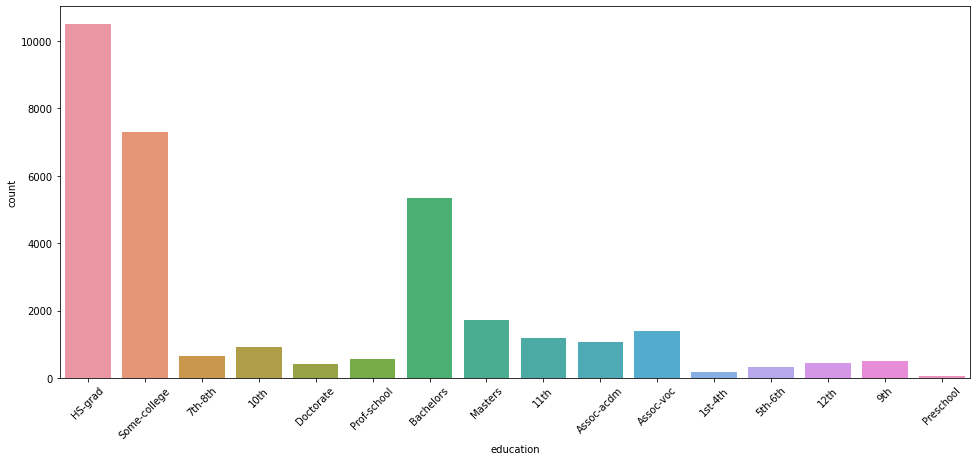

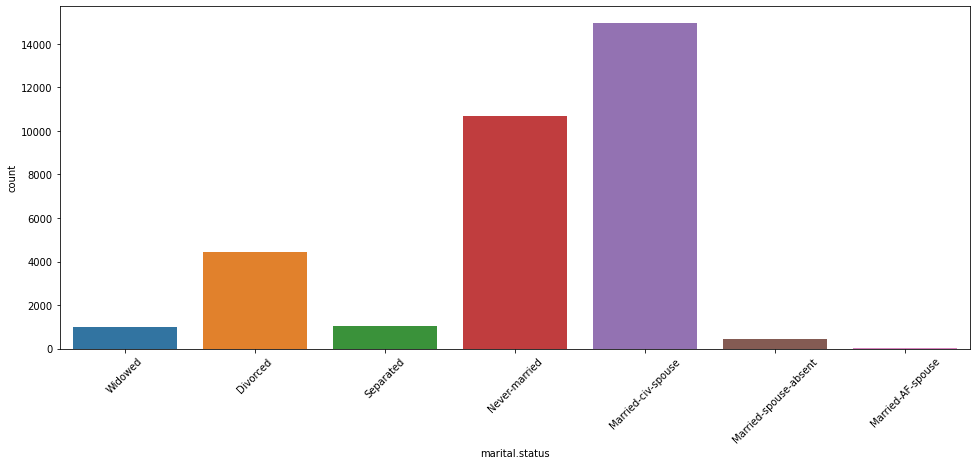

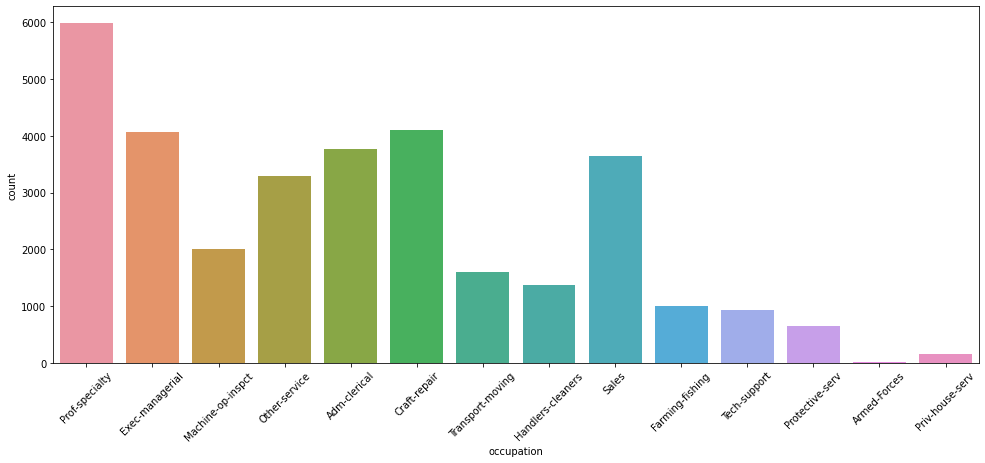

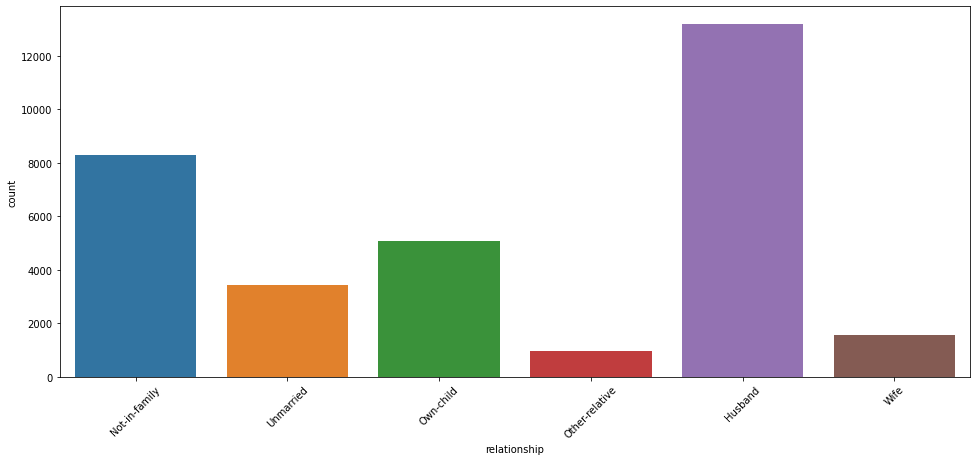

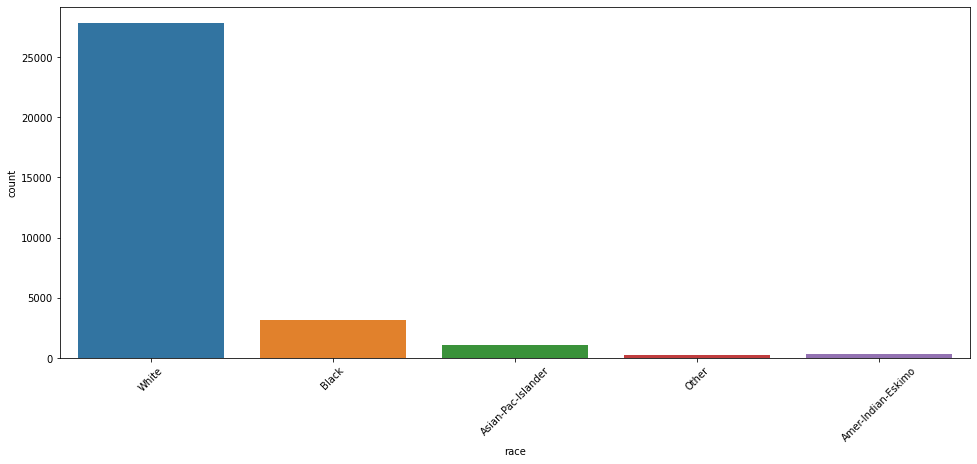

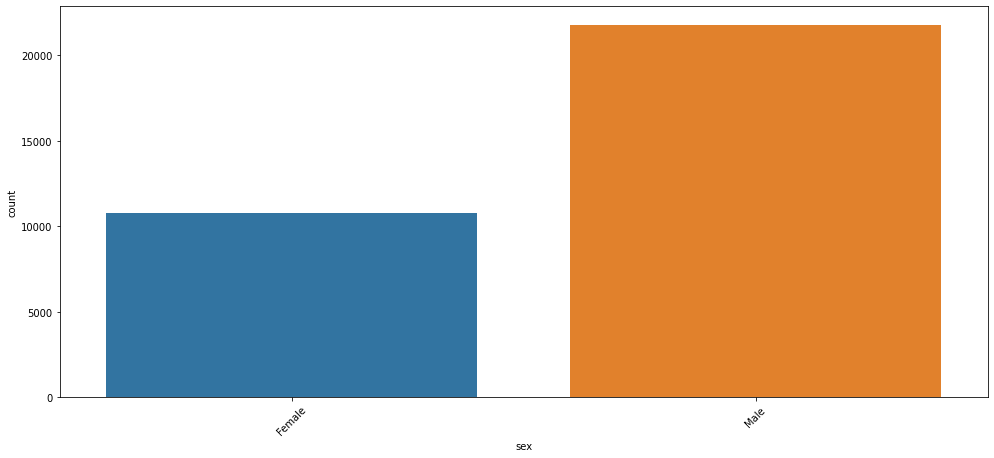

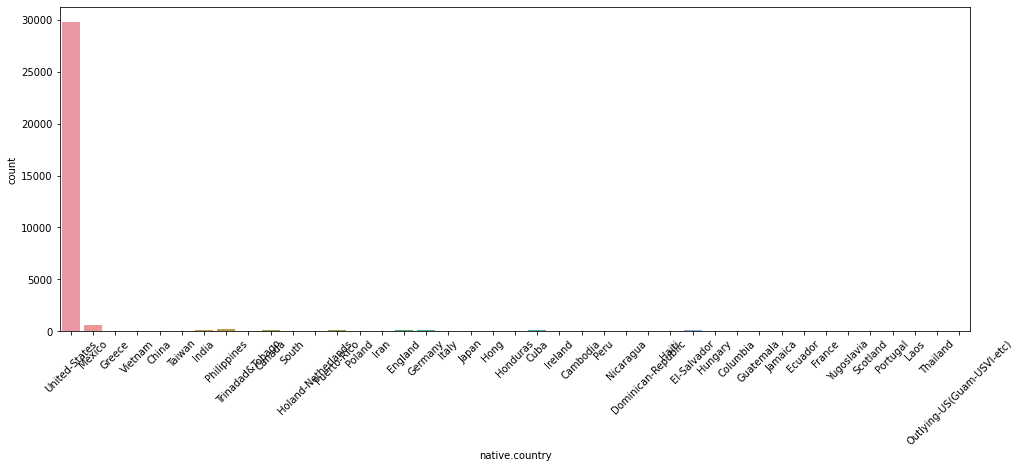

In [37]:
# categorical columns
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cat_col)):
    plt.figure(figsize=(40, 50))
    plt.subplot(8, 3, i+1)
    sns.countplot(x=df[cat_col[i]])
    plt.xlabel(cat_col[i])
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()

In [38]:
df[list(df.columns)[1:]].corr()

,education.num,hours.per.week,income
education.num,1.000000,0.148123,0.335154
hours.per.week,0.148123,1.000000,0.229689
income,0.335154,0.229689,1.000000


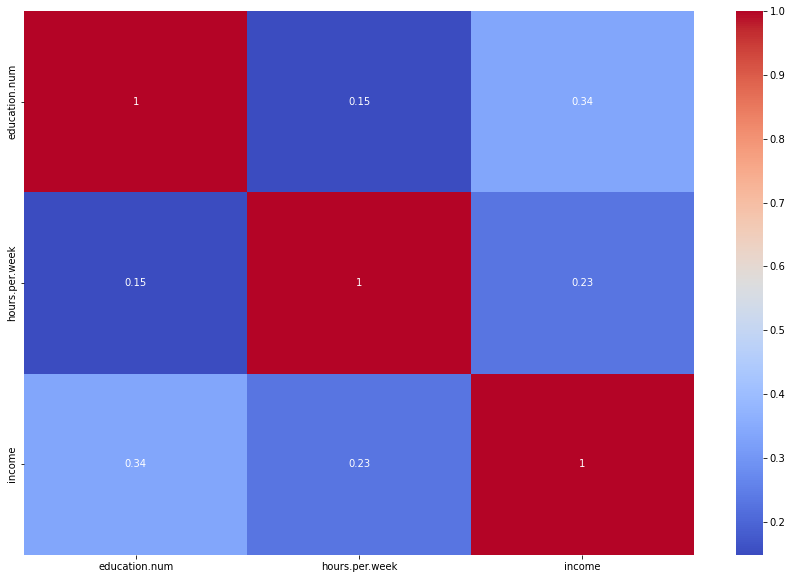

In [39]:
# Correlation between the features.
plt.figure(figsize = (15,10))
sns.heatmap(df[list(df.columns)[1:]].corr(), cmap="coolwarm", annot=True)
plt.show()

In [16]:
# Check Multicollinearity for Categorical features.
#  The sum of the expected numbers for each sample must equal the sum of the observed numbers for each sample,
# which is a useful check. We now subtract each expected number from its corresponding observed number.
chi2_test = []
for feature in df[cat_col]:
    if chi2_contingency(pd.crosstab(df['income'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[cat_col, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']

In [17]:
# Reject Null Hypothesis helps us to decide that the two categorical features
# are not the same and needs to be maintained.
result

,Column,Hypothesis Result
0,workclass,Reject Null Hypothesis
1,education,Reject Null Hypothesis
2,marital.status,Reject Null Hypothesis
3,occupation,Reject Null Hypothesis
4,relationship,Reject Null Hypothesis
5,race,Reject Null Hypothesis
6,sex,Reject Null Hypothesis
7,native.country,Reject Null Hypothesis


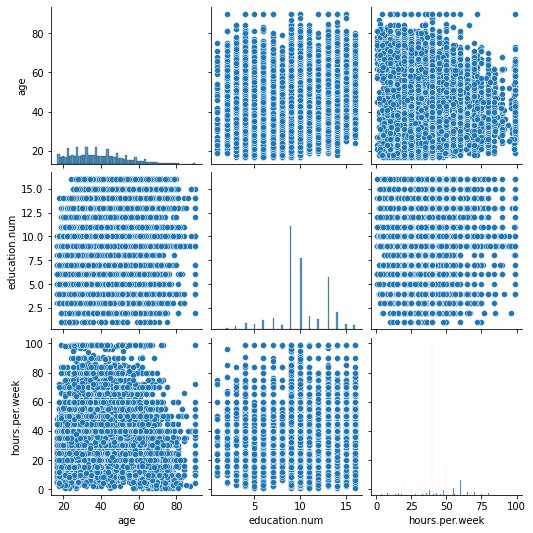

In [43]:
# To plot multiple pairwise bivariate distributions in a dataset, you can use the .pairplot() function. 
# The diagonal plots are the univariate plots, and this displays the relationship for the (n, 2) combination of variables in a DataFrame 
#as a matrix of plots.
sns.pairplot(df[num_col])

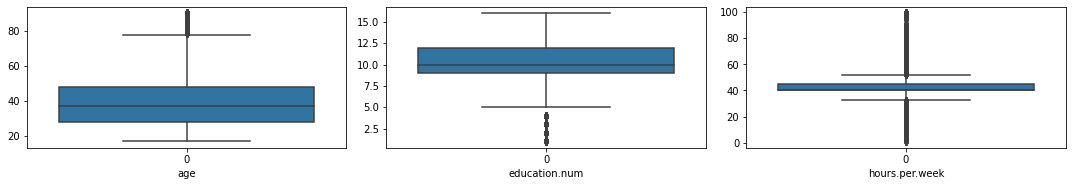

In [44]:
plt.figure(figsize=(15,20))
for i in range(0,len(num_col)):
    plt.subplot(8, 3, i+1)
    no_col = str(num_col[i])
    df_feat = df[no_col].reset_index(drop=True)
    sns.boxplot(data=df_feat)
    plt.xlabel(no_col)
    plt.tight_layout()
plt.show()
#so we can see that to many outliers are there so we have to treat them before going to model building

In [18]:
# Function to detect outliers
def threshold_outliers(df, variable):
    quartile1 = df[variable].quantile(0.25)
    quartile3 = df[variable].quantile(0.75)
    iq_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * iq_range
    low_limit = quartile1 - 1.5 * iq_range
    return low_limit, up_limit

In [19]:
## function to replace the outlier values with mean of the distribution.
def replace_with_thresholds(df, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = threshold_outliers(df, variable)
        df.loc[(df[variable] < low_limit), variable] = df[variable].mean()
        df.loc[(df[variable] > up_limit), variable] = df[variable].mean()

In [20]:
replace_with_thresholds(df,num_col)

In [21]:
encoder = OrdinalEncoder()

data_categorical = df[cat_col]
data_categorical.head()

data_encoded = encoder.fit_transform(data_categorical)

a = pd.DataFrame(data_encoded,columns=cat_col)
b = df[['age','hours.per.week','income']]
#c=data['hours-per-week']
new_df = pd.concat([b,a],axis=1)

In [22]:
new_df.head(10)

,age,hours.per.week,income,workclass,education,marital.status,occupation,relationship,race,sex,native.country
0,38.581647,40.000000,0,3.0,11.0,6.0,9.0,1.0,4.0,0.0,38.0
1,38.581647,40.437456,0,3.0,11.0,6.0,3.0,1.0,4.0,0.0,38.0
2,66.000000,40.000000,0,3.0,15.0,6.0,9.0,4.0,2.0,0.0,38.0
3,54.000000,40.000000,0,3.0,5.0,0.0,6.0,4.0,4.0,0.0,38.0
4,41.000000,40.000000,0,3.0,15.0,5.0,9.0,3.0,4.0,0.0,38.0
5,34.000000,45.000000,0,3.0,11.0,0.0,7.0,4.0,4.0,0.0,38.0
6,38.000000,40.000000,0,3.0,0.0,5.0,0.0,4.0,4.0,1.0,38.0
7,74.000000,40.437456,1,6.0,10.0,4.0,9.0,2.0,4.0,0.0,38.0
8,68.000000,40.000000,0,0.0,11.0,0.0,9.0,1.0,4.0,0.0,38.0
9,41.000000,43.710574,1,3.0,15.0,4.0,2.0,4.0,4.0,1.0,38.0


In [23]:
for col in [ 'hours.per.week', 'income','age']:
    new_df[col].fillna(new_df[col].mode()[0], inplace=True)

In [24]:
X = new_df.drop(['income'], axis=1)
y = new_df['income']

In [52]:
print(y.unique())

[0 1]


In [35]:
X_train_val, X_test, y_train_val,y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [36]:
X_train = X_train_val[:18000]
y_train = y_train_val[:18000]
X_val = X_train_val[18001:]
y_val = y_train_val[18001:]

In [27]:
columns = cat_col + ['age','hours.per.week']
print(columns)

['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'age', 'hours.per.week']


In [37]:
scaler = StandardScaler()
X_train = pd.DataFrame(data=scaler.fit_transform(X_train),columns=columns)
X_val = pd.DataFrame(data=scaler.transform(X_val),columns=columns)
X_test = pd.DataFrame(data=scaler.transform(X_test),columns=columns)

In [38]:
y_train

32098    0
25206    1
23491    0
12367    0
7054     1
        ..
6587     1
30120    0
25893    0
12248    0
5734     0
Name: income, Length: 18000, dtype: int64

In [39]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(n_estimators = 500,
                        learning_rate = 0.05,
                        use_label_encoder = False,
                        eval_metric = "logloss",
                        early_stopping_rounds = 5,
                        n_jobs = -1)

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [40]:
xgb_clf.fit(X_train, y_train,eval_set = [(X_val,y_val)],verbose=False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=5,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=500, n_jobs=-1,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [41]:
from sklearn.metrics import accuracy_score
import numpy as np

In [42]:
pred_test = xgb_clf.predict(X_test)
test_score = accuracy_score(pred_test, y_test)
print("Test score:", np.round(test_score,2))

Test score: 0.84
